In [2]:
import numpy as np
#np.random.seed(1895)  # for reproducibility
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os
from keras import backend

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [3]:
train_path = 'images_tvt_split/train' 
valid_path = 'images_tvt_split/valid'
test_path = 'images_tvt_split/test'

In [4]:
train_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True).flow_from_directory(
        train_path, target_size=(150, 150),  
         #batch_size=batch_size,
        class_mode='binary')  

Found 536 images belonging to 2 classes.


In [5]:
valid_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True).flow_from_directory(
        valid_path, target_size=(150, 150),  
         #batch_size=batch_size,
        class_mode='binary')  

Found 178 images belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True).flow_from_directory(
        test_path, target_size=(150, 150),  
         #batch_size=batch_size,
        class_mode='binary', shuffle=False)  

Found 178 images belonging to 2 classes.


In [7]:
next(train_generator)[0].shape

(32, 150, 150, 3)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
backend.set_value(model.optimizer.learning_rate, 0.0001)
model.optimizer.learning_rate.numpy()

1e-04

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [12]:
history = model.fit(
        train_generator,
#         steps_per_epoch=2000, 
        epochs=25,
        validation_data=valid_generator)
#         validation_steps=800)
# model.save_weights('first_try.h5')

Epoch 1/25
 2/17 [==>...........................] - ETA: 15s - loss: 0.7180 - accuracy: 0.4375

/Users/stellato/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


17/17 [==============================] - 26s 1s/step - loss: 0.7035 - accuracy: 0.5065 - val_loss: 0.6602 - val_accuracy: 0.5618
Epoch 2/25
17/17 [==============================] - 22s 1s/step - loss: 0.6540 - accuracy: 0.5896 - val_loss: 0.5937 - val_accuracy: 0.7472
Epoch 3/25
17/17 [==============================] - 42s 2s/step - loss: 0.6217 - accuracy: 0.6674 - val_loss: 0.5377 - val_accuracy: 0.8371
Epoch 4/25
17/17 [==============================] - 27s 2s/step - loss: 0.5665 - accuracy: 0.7455 - val_loss: 0.4864 - val_accuracy: 0.8596
Epoch 5/25
17/17 [==============================] - 25s 1s/step - loss: 0.4855 - accuracy: 0.7830 - val_loss: 0.4237 - val_accuracy: 0.8933
Epoch 6/25
17/17 [==============================] - 25s 1s/step - loss: 0.4906 - accuracy: 0.7774 - val_loss: 0.4080 - val_accuracy: 0.8933
Epoch 7/25
17/17 [==============================] - 46s 3s/step - loss: 0.4289 - accuracy: 0.8099 - val_loss: 0.4394 - val_accuracy: 0.8034
Epoch 8/25
17/17 [=============

In [13]:
#model.summary()

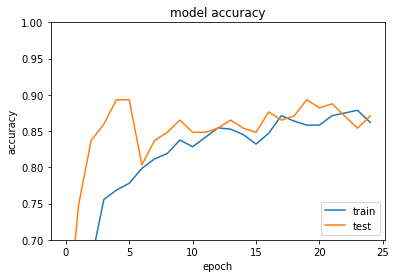

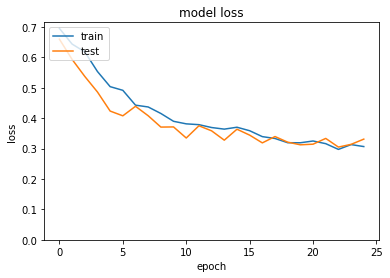

In [43]:
fig, ax = plt.subplots(figsize=(6,4))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.set_ylim(0.7, 1.0)
ax.set_yticks(np.arange(0.70,1.00,0.05))

plt.legend(['train', 'test'], loc='lower right')
plt.show()

fig, ax = plt.subplots(figsize=(6,4))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

ax.set_yticks(list(np.arange(0.0,0.80,0.1)))


plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save(f'./keras_1')

INFO:tensorflow:Assets written to: ./keras_1/assets


In [16]:
plt.savefig('keras1_accuracy_loss')

<Figure size 432x288 with 0 Axes>

In [17]:
#keras Sequential() CNN
model.evaluate(test_generator, verbose=True)

2/6 [=========>....................] - ETA: 1s - loss: 0.2120 - accuracy: 0.9375

/Users/stellato/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


6/6 [==============================] - 4s 809ms/step - loss: 0.2798 - accuracy: 0.9045


[0.2798183858394623, 0.9044944047927856]

In [18]:
from src.plotting import plot_confusion_matrix

In [19]:
predictions = model.predict(x=test_generator, verbose=0)

In [20]:
# np.round(predictions)

In [21]:
cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.round(predictions))

Confusion matrix without normalization
[[91  6]
 [13 68]]


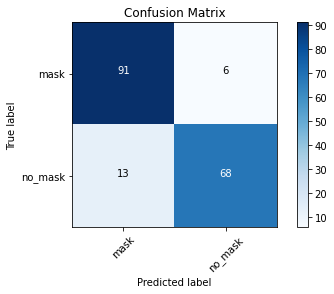

In [22]:
cm_plot_labels = ['mask', 'no_mask']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')